# Wine dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

## Read data set from UCI

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                             'ml/machine-learning-databases/'
                             'wine/wine.data', header=None)

In [4]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [6]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

## Rescaling: Standardization vs Normalization

In [7]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [8]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [9]:
ex = np.array([0, 1, 2, 3, 4, 5])
pd.DataFrame({'ex':ex,
              'standardized': (ex - ex.mean()) / ex.std(),
              'normalized': (ex - ex.min()) / (ex.max() - ex.min())})

,ex,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


## Regularization

With vs without regularization: Without regularization, we get larger coefficients.

In [10]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', penalty='none')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [11]:
abs(lr.intercept_).mean()

13.846086173541238

In [12]:
abs(lr.coef_).mean()

7.074127498077364

In [13]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', penalty='l2', C=1.0)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [14]:
abs(lr.intercept_).mean()

2.1549090777265856

In [15]:
abs(lr.coef_).mean()

0.6581218738805708

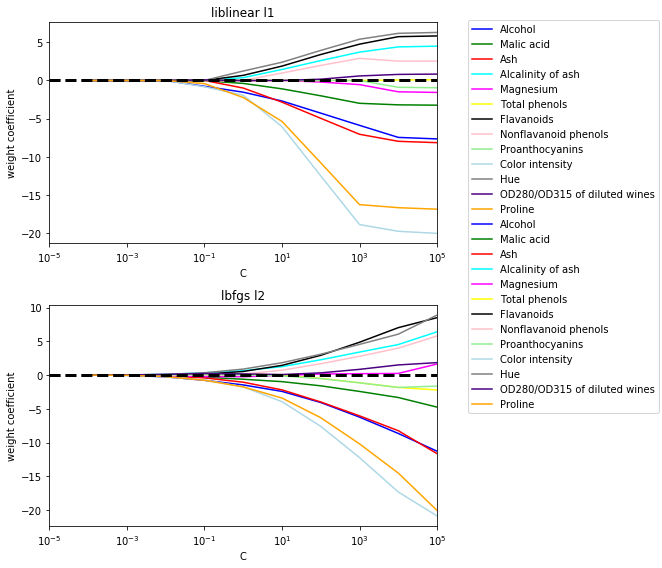

In [16]:
fig = plt.figure(figsize=(6.4, 8), tight_layout=True)

    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

for i, solver,penalty in [(1, 'liblinear', 'l1'),
                          (2, 'lbfgs', 'l2')]:
    
    ax = plt.subplot(2, 1, i)
    
    weights, params = [], []
    for c in np.arange(-4., 6.):
        lr = LogisticRegression(solver=solver,
                                multi_class='ovr', 
                                penalty=penalty, C=10.**c,
                                random_state=0)
        lr.fit(X_train_std, y_train)
        weights.append(lr.coef_[1])
        params.append(10**c)

    weights = np.array(weights)

    for column, color in zip(range(weights.shape[1]), colors):
        plt.plot(params, weights[:, column],
                 label=df_wine.columns[column + 1],
                 color=color)
    plt.axhline(0, color='black', linestyle='--', linewidth=3)
    plt.xlim([10**(-5), 10**5])
    plt.ylabel('weight coefficient')
    plt.xlabel('C')
    plt.xscale('log')
    plt.title(' '.join((solver, penalty)))

fig.legend(loc='upper right', 
          bbox_to_anchor=(1.44, 0.96),
          ncol=1, fancybox=True)

plt.show()